#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action = 'ignore', category = FutureWarning)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#### Importing the cleaned dataset

In [2]:
clean_data = pd.read_csv('clean_data.csv', low_memory=False)
clean_data.head()

country code  year  schizophrenia  bipolar_disorder  eating_disorders  \
0  Afghanistan  AFG  1990       0.160560          0.697779          0.101855   
1  Afghanistan  AFG  1991       0.160312          0.697961          0.099313   
2  Afghanistan  AFG  1992       0.160135          0.698107          0.096692   
3  Afghanistan  AFG  1993       0.160037          0.698257          0.094336   
4  Afghanistan  AFG  1994       0.160022          0.698469          0.092439   

   anxiety_disorders  drug_use_disorders  depression  alcohol_use_disorders  \
0           4.828830            1.677082    4.071831               0.672404   
1           4.829740            1.684746    4.079531               0.671768   
2           4.831108            1.694334    4.088358               0.670644   
3           4.830864            1.705320    4.096190               0.669738   
4           4.829423            1.716069    4.099582               0.669260   

   prevalence_male  prevalence_female  population  suicide_rate_per_100k  \
0         3.499982           4.647815  12412000.0              10.318504   
1         3.503947           4.655772  13299000.0              10.327010   
2         3.508912           4.662066  14486000.0              10.271411   
3         3.513429           4.669012  15817000.0              10.376123   
4         3.515578           4.673050  17076000.0              10.575915   

   depressive_disorder_rate_per_100k  depressive_disorders  
0                        4039.755763         318435.813670  
1                        4046.256034         329044.773956  
2                        4053.709902         382544.572895  
3                        4060.203474         440381.507393  
4                        4062.290365         456916.645489

#### Data Exploration

In [16]:
gender = clean_data[['prevalence_male', 'prevalence_female']].describe()
gender

prevalence_male  prevalence_female
count      5544.000000        5544.000000
mean          2.806228           4.144861
std           0.553345           0.863277
min           1.594129           2.348094
25%           2.398399           3.494550
50%           2.776067           4.187247
75%           3.146948           4.647816
max           4.905163           8.537801

#### Prevalence of mental health disorders by gender

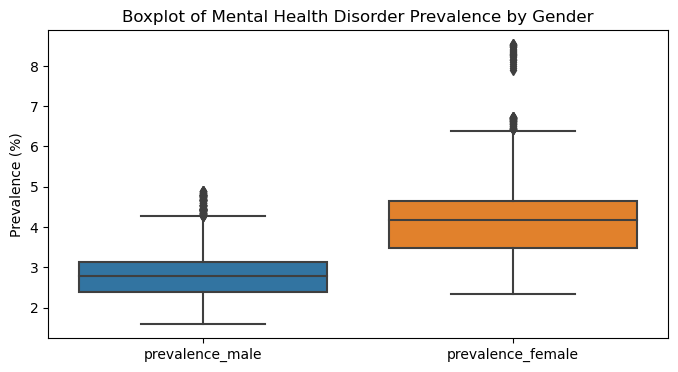

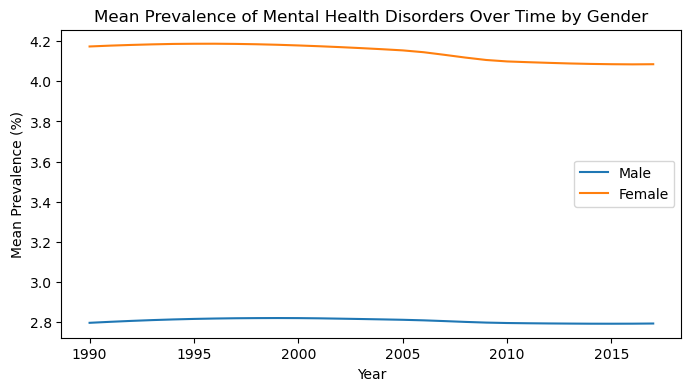

In [17]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = clean_data[['prevalence_male', 'prevalence_female']])
plt.title('Boxplot of Mental Health Disorder Prevalence by Gender')
plt.ylabel('Prevalence (%)')
plt.show()

# calculate the mean prevalence by gender for each disorder
mean_prevalence_by_gender = clean_data.groupby('year')[['prevalence_male', 'prevalence_female']].mean().reset_index()

# Plot the mean prevalence over the years by gender
plt.figure(figsize=(8, 4))
plt.plot(mean_prevalence_by_gender['year'], mean_prevalence_by_gender['prevalence_male'], label='Male')
plt.plot(mean_prevalence_by_gender['year'], mean_prevalence_by_gender['prevalence_female'], label='Female')
plt.title('Mean Prevalence of Mental Health Disorders Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Mean Prevalence (%)')
plt.legend()
plt.show()

#### Results: 
- ***The mean prevalence of mental health disorders is higher in females (approximately 4.16%) than in males (approximately 2.81%) across all the data.***
- ***There is also greater variability in the prevalence among females, with a standard deviation of around 0.87%, compared to about 0.55% for males.***
- ***The minimum prevalence recorded is higher for females (2.35%) than for males (1.59%), and the same trend is seen in the maximum prevalence values, where females reach up to 8.54%, while males go up to 4.91%.***

#### Explore gender disparities in the prevalence of various mental health disorders

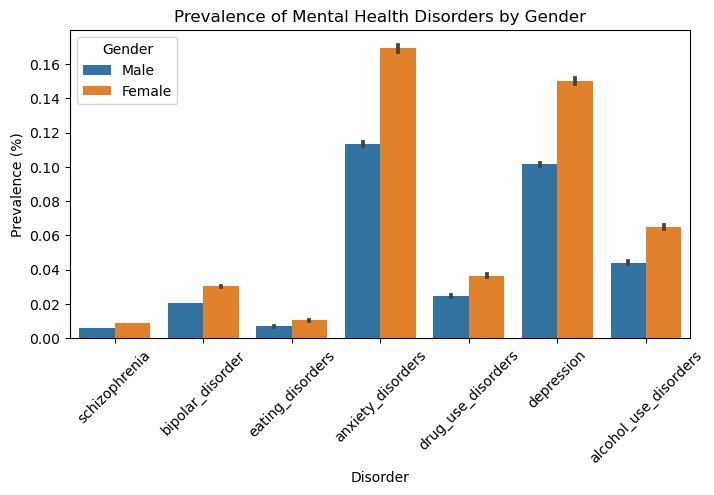

In [4]:
disorders = [
    'schizophrenia', 'bipolar_disorder', 'eating_disorders',
    'anxiety_disorders', 'drug_use_disorders', 'depression',
    'alcohol_use_disorders'
]

# create two new dataframes, one for each gender, with the disorder prevalence
male_disorders = clean_data[['country', 'year'] + disorders].copy()
female_disorders = clean_data[['country', 'year'] + disorders].copy()

# add a gender column to each
male_disorders['gender'] = 'Male'
female_disorders['gender'] = 'Female'

# adjust the prevalence to reflect gender-specific data
for disorder in disorders:
    male_disorders[disorder] = clean_data['prevalence_male'] / 100 * clean_data[disorder]
    female_disorders[disorder] = clean_data['prevalence_female'] / 100 * clean_data[disorder]

# concatenate the male and female data
gender_specific_disorders = pd.concat([male_disorders, female_disorders], ignore_index=True)

# melt the data to have one disorder per row
melted_disorders = gender_specific_disorders.melt(id_vars=['country', 'year', 'gender'],
                                                  value_vars=disorders,
                                                  var_name='disorder',
                                                  value_name='prevalence')

# plot the data
plt.figure(figsize=(8, 4))
sns.barplot(x='disorder', y='prevalence', hue='gender', data=melted_disorders)
plt.title('Prevalence of Mental Health Disorders by Gender')
plt.xticks(rotation=45)
plt.ylabel('Prevalence (%)')
plt.xlabel('Disorder')
plt.legend(title='Gender')
plt.show()

#### Results:
- ***Anxiety disorders and depression have the highest percentage shares among females, indicating these are more prevalent within the female subset of the data.***
- ***Eating disorders, while less prevalent than anxiety and depression, also show a higher percentage share in females compared to males.***

#### Correlations between various mental health disorders and suicide rates

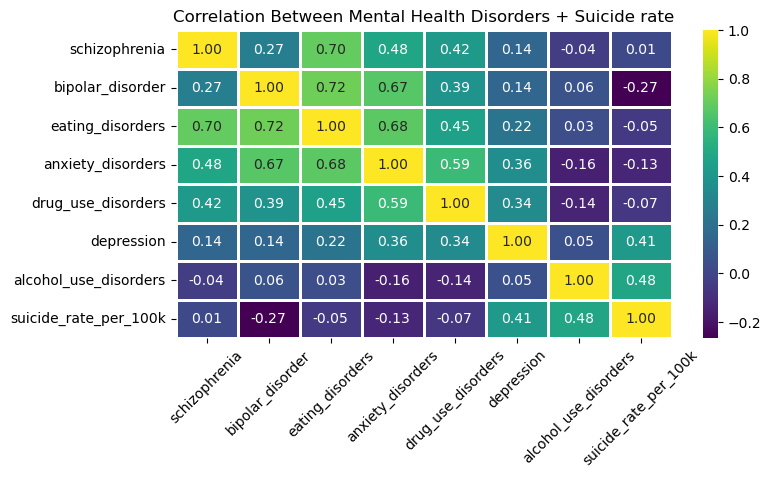

In [5]:
disorders = [
    'schizophrenia', 'bipolar_disorder', 'eating_disorders',
    'anxiety_disorders', 'drug_use_disorders', 'depression',
    'alcohol_use_disorders', 'suicide_rate_per_100k'
]

selected_disorders = clean_data[disorders]

correlation_matrix = selected_disorders.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot = True, cmap='viridis', fmt = ".2f", linewidths = 1, linecolor = 'white')

plt.title('Correlation Between Mental Health Disorders + Suicide rate', fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10) 
plt.yticks(fontsize = 10)  
plt.show()

#### Results:
- **Eating disorders and Schizophrenia correlation (0.71), suggesting a strong positive relationship**
- **Eating disorders and Bipolar Disorder correlation: There's a relatively high positive correlation (0.72)**
- **Anxiety disorders: show moderate positive correlations with other mental health conditions, such as bipolar disorder (0.66), eating disorders (0.70), and drug use disorders (0.62)**
- **Suicide Rates: Depression and Alcohol use disorders has a positive correlation with suicide rates (0.40, 0.47), indicating that as the prevalence of these disorders increases, there may be a corresponding increase in the suicide rate.**


#### Top 10 countries with the highest average prevalence rates for various mental health disorders and suicide rates

In [6]:
mean_prevalence_by_country = clean_data.groupby('country')[disorders].mean().reset_index()

top_countries_by_disorder = {}
for disorder in disorders:
    top_countries = mean_prevalence_by_country.nlargest(10, disorder)[['country', disorder]]
    top_countries_by_disorder[disorder] = top_countries

top_countries_by_disorder 

{'schizophrenia':            country  schizophrenia
 122    Netherlands       0.372330
 9        Australia       0.364498
 123    New Zealand       0.340113
 187  United States       0.338117
 37           China       0.327059
 84         Ireland       0.318805
 69       Greenland       0.318408
 32          Canada       0.314473
 88           Japan       0.294693
 164          Spain       0.280540,
 'bipolar_disorder':               country  bipolar_disorder
 123       New Zealand          1.199014
 9           Australia          1.144660
 128  Northern Ireland          1.142926
 55            England          1.105841
 25             Brazil          1.102082
 186    United Kingdom          1.086969
 136          Paraguay          1.069752
 169            Sweden          1.060619
 61            Finland          1.008932
 48            Denmark          1.008923,
 'eating_disorders':          country  eating_disorders
 9      Australia          0.838270
 102   Luxembourg          0.6861

#### Global prevalence of each mental health disorder using a choropleth map

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\3590707935.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


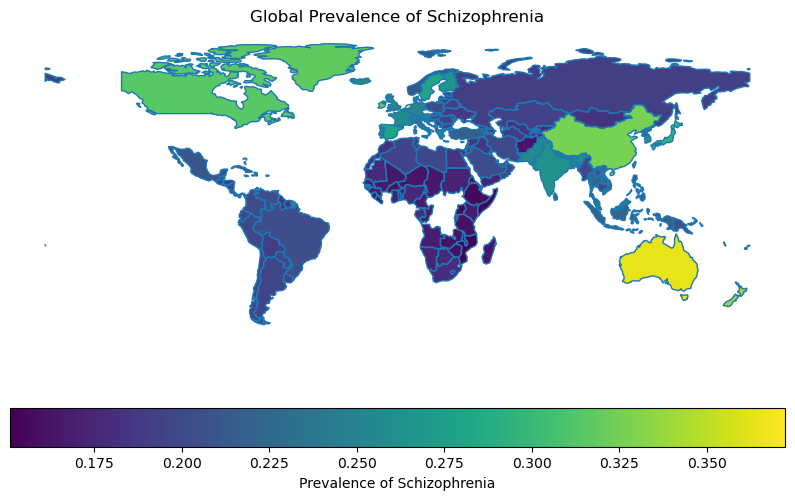

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'schizophrenia'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\1748538871.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


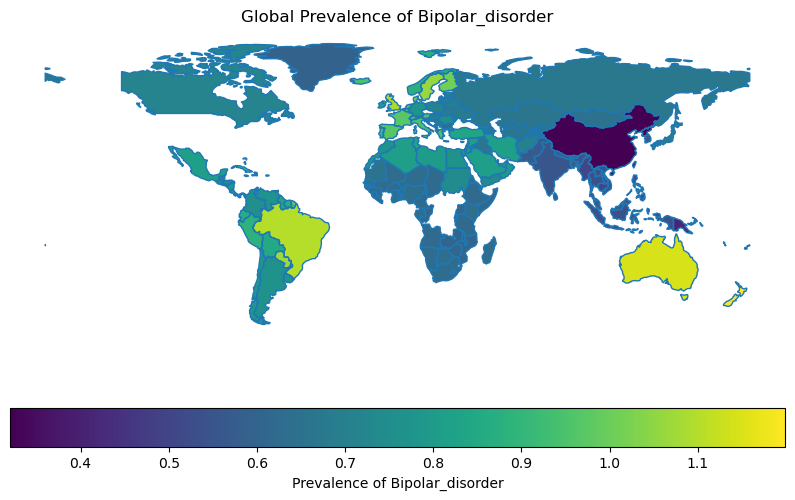

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'bipolar_disorder'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\1100109917.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


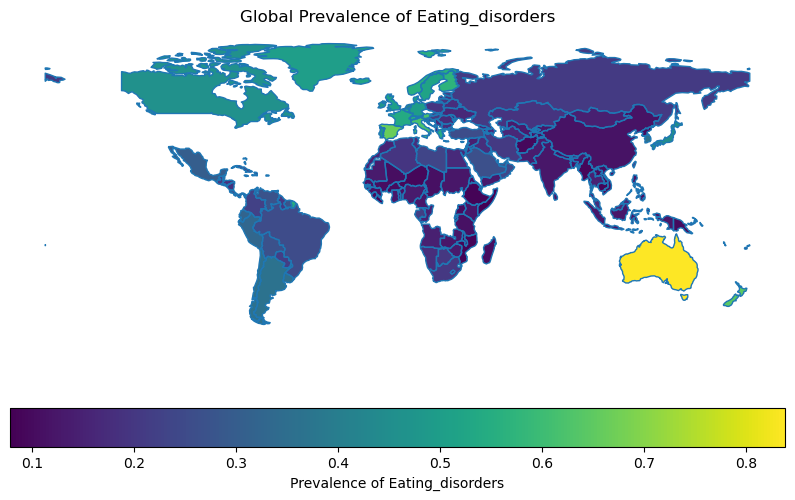

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'eating_disorders'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'anxiety_disorders'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\1913344995.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\205982781.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


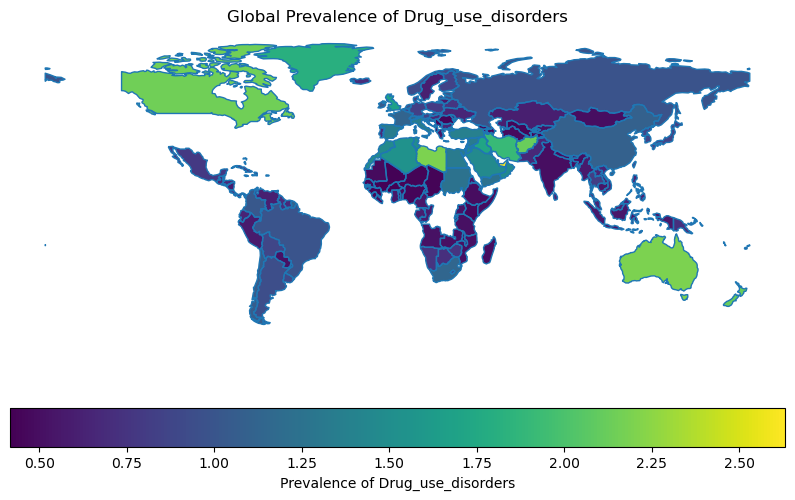

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'drug_use_disorders'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'depression'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\1645855044.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'country', 'code', 'gdp_md_est', 'geometry']
world = world.merge(mean_prevalence_by_country, on = 'country')

disorder_to_visualize = 'alcohol_use_disorders'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column=disorder_to_visualize, ax=ax, legend=True,
           legend_kwds={'label': "Prevalence of " + disorder_to_visualize.capitalize(),
                        'orientation': "horizontal"})

ax.set_axis_off()
plt.title('Global Prevalence of ' + disorder_to_visualize.capitalize())
plt.show()

C:\Users\Benji\AppData\Local\Temp\ipykernel_31460\118801829.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


#### Choropleth map visualizing the average suicide rates per 100,000 people for each country

In [14]:
mean_suicide_rate_by_country = clean_data.groupby('country')['suicide_rate_per_100k'].mean().reset_index()

import plotly.express as px

map_data = mean_suicide_rate_by_country

fig = px.choropleth(map_data,
                    locations="country",
                    locationmode="country names",
                    color="suicide_rate_per_100k",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Suicide Rates per 100k")
fig.show()